In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])

Training samples: 60000
Test samples: 10000


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1244 - accuracy: 0.9620 - val_loss: 0.0466 - val_accuracy: 0.9851
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0262 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0277 - val_accuracy: 0.9912


In [6]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

✅ Test Accuracy: 99.12%


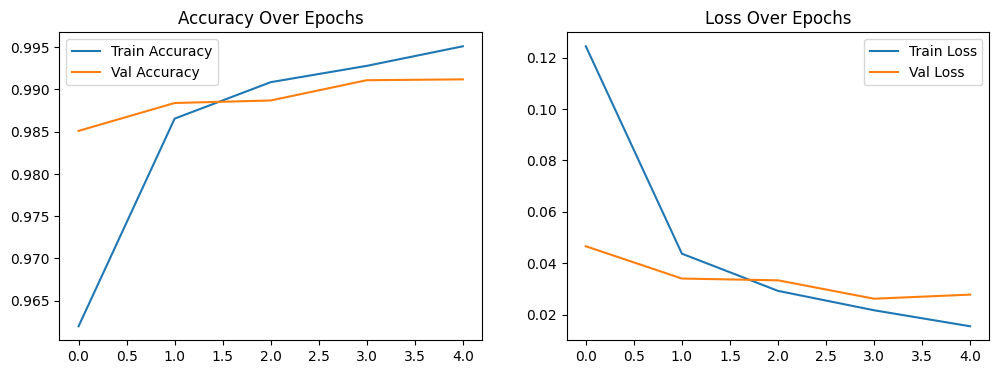

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.show()

1/1 [==============================] - 0s 81ms/step


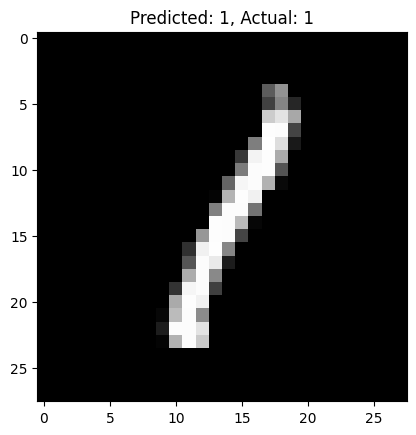

In [8]:
idx = 202
sample = x_test[idx].reshape(1,28,28,1)

prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_class}, Actual: {y_test[idx]}")
plt.show()